In [212]:
#import libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import numpy
import pandas as pd
import tensorflow as tf

In [213]:
#load dataset directly from keras library
(X_train,y_train),(X_test,y_test)=mnist.load_data()

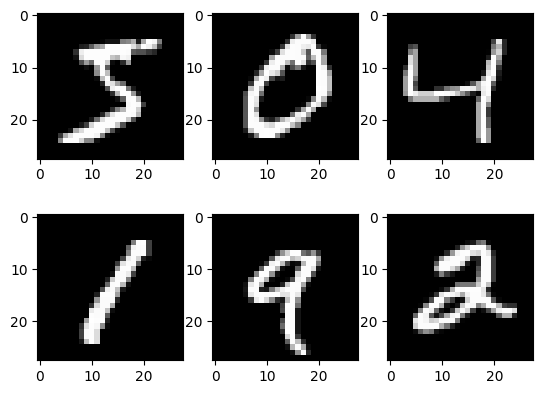

In [214]:
#plot first six samples of MNIST training dataset as grey scale image
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(int('23'+str(i+1)))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))    

In [215]:
print(X_train.shape , X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [216]:
import numpy as np
#normalize inputs
X_train = X_train / 255.0
X_test = X_test / 255.0

#reshape format
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [217]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [218]:
#fit the model
model.fit(X_train,y_train,epochs=20,batch_size=128,verbose=2)
print("The model has successfully trained")

#save the modelf
model.save('modeldig.h5')
print("The model has successfully saved")

Epoch 1/20
300/300 - 11s - loss: 0.3057 - accuracy: 0.9111 - 11s/epoch - 37ms/step
Epoch 2/20
300/300 - 9s - loss: 0.0693 - accuracy: 0.9786 - 9s/epoch - 29ms/step
Epoch 3/20
300/300 - 9s - loss: 0.0492 - accuracy: 0.9854 - 9s/epoch - 30ms/step
Epoch 4/20
300/300 - 9s - loss: 0.0393 - accuracy: 0.9881 - 9s/epoch - 29ms/step
Epoch 5/20
300/300 - 10s - loss: 0.0333 - accuracy: 0.9897 - 10s/epoch - 32ms/step
Epoch 6/20
300/300 - 9s - loss: 0.0283 - accuracy: 0.9914 - 9s/epoch - 29ms/step
Epoch 7/20
300/300 - 9s - loss: 0.0255 - accuracy: 0.9918 - 9s/epoch - 29ms/step
Epoch 8/20
300/300 - 9s - loss: 0.0213 - accuracy: 0.9929 - 9s/epoch - 30ms/step
Epoch 9/20
300/300 - 9s - loss: 0.0183 - accuracy: 0.9941 - 9s/epoch - 29ms/step
Epoch 10/20
300/300 - 9s - loss: 0.0155 - accuracy: 0.9949 - 9s/epoch - 29ms/step
Epoch 11/20
300/300 - 9s - loss: 0.0139 - accuracy: 0.9955 - 9s/epoch - 31ms/step
Epoch 12/20
300/300 - 9s - loss: 0.0114 - accuracy: 0.9964 - 9s/epoch - 30ms/step
Epoch 13/20
300/300 -

In [9]:
scores=model.evaluate(X_test,y_test,verbose=0)
print("CNN Error: %.2f%%" %(100-scores[1]*100))

CNN Error: 0.97%


In [10]:
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.0470 - accuracy: 0.9903
[0.04704870656132698, 0.9902999997138977]


In [11]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 2s 5ms/step


In [219]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

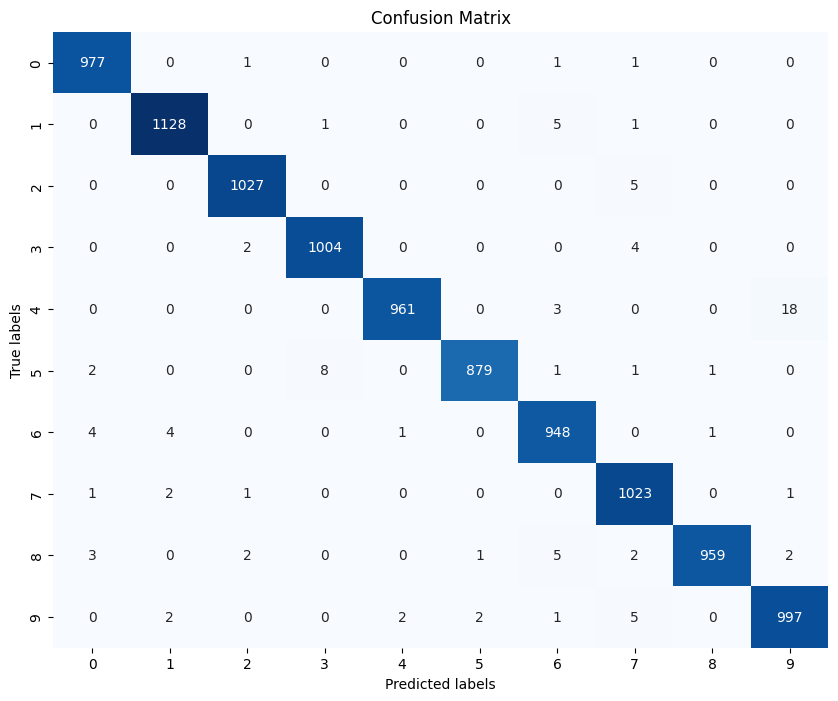

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [222]:
from tkinter import *

import cv2
import numpy as np
from PIL import ImageGrab
from tensorflow.keras.models import load_model

model = load_model('modeldig.h5')
image_folder = "img/"

root = Tk()
root.resizable(0, 0)
root.title("HDR")

lastx, lasty = None, None
image_number = 0

cv = Canvas(root, width=640, height=480, bg='white')
cv.grid(row=0, column=0, pady=2, sticky=W, columnspan=2)


def clear_widget():
    global cv
    cv.delete('all')


def draw_lines(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=8, fill='black', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    lastx, lasty = x, y


def activate_event(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', draw_lines)
    lastx, lasty = event.x, event.y


cv.bind('<Button-1>', activate_event)


def Recognize_Digit():
    global image_number
    filename = f'img_{image_number}.png'
    widget = cv

    x = root.winfo_rootx() + widget.winfo_rootx()
    y = root.winfo_rooty() + widget.winfo_rooty()
    x1 = x + widget.winfo_width()
    y1 = y + widget.winfo_height()
    print(x, y, x1, y1)

    # get image and save
    ImageGrab.grab().crop((x, y, x1, y1)).save(image_folder + filename)

    image = cv2.imread(image_folder + filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # make a rectangle box around each curve
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = th[y:y + h, x:x + w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18, 18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        digit = padded_digit.reshape(1, 28, 28, 1)
        digit = digit / 255.0

        pred = model.predict([digit])[0]
        final_pred = np.argmax(pred)
        data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255, 0, 0)
        thickness = 1
        cv2.putText(image, data, (x, y - 5), font, fontScale, color, thickness)
    cv2.imshow('image', image)
    cv2.waitKey(0)


btn_save = Button(text='Recognize Digit', command=Recognize_Digit)
btn_save.grid(row=2, column=0, pady=1, padx=1)
button_clear = Button(text='Clear Widget', command=clear_widget)
button_clear.grid(row=2, column=1, pady=1, padx=1)

root.mainloop()

68 116 712 600
1/1 [==============================] - 0s 157ms/step
68 116 712 600
1/1 [==============================] - 0s 47ms/step
68 116 712 600
1/1 [==============================] - 0s 53ms/step


In [2]:
#Words recognition

from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [3]:
base_path = "data/words"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
  if line[0] =="#":
    continue
  if line.split(" ")[1] != "err":
    words_list.append(line)

len(words_list)

np.random.shuffle(words_list)

In [4]:
split_idx = int(0.9*len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(test_samples)

print(f"Total Training Samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total Training Samples: 86810
Total validation samples: 4823
Total test samples: 4823


In [5]:
base_image_path = os.path.join(base_path, "words")
print(base_path)
def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split willl have this format for the the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
             base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples

train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

data/words


In [6]:
train_labels[0: 10]

['e04-030-04-08 ok 170 1489 1499 120 39 JJ sure',
 'k02-102-05-03 ok 182 836 1623 69 52 PP3A he',
 'a01-082u-01-04 ok 172 1582 1043 234 88 IN during',
 'm01-000-07-00 ok 196 339 1998 75 107 INO of',
 'g01-031-07-06 ok 152 1912 2038 167 59 NN booty',
 'f07-081b-01-06 ok 168 1366 924 350 88 NN gastronomy',
 'n03-082-04-03 ok 165 992 1414 118 135 NN boy',
 'g06-018c-04-05 ok 182 1298 1438 96 58 ATI The',
 'g06-011j-06-06 ok 182 1222 1785 146 95 CC and',
 'f04-024-01-06 ok 183 1104 981 60 70 IN in']

In [7]:
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
  label = label.split(" ")[-1].strip()
  for char in label:
    characters.add(char)

  max_len = max(max_len, len(label))
  train_labels_cleaned.append(label)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples
train_labels_cleaned[:10]

Maximum length:  21
Vocab size:  78


['sure',
 'he',
 'during',
 'of',
 'booty',
 'gastronomy',
 'boy',
 'The',
 'and',
 'in']

In [8]:
def clean_labels(labels):
  cleaned_labels = []
  for label in labels:
    label = label.split(" ")[-1].strip()
    cleaned_labels.append(label)
  return cleaned_labels

validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

# Maping characaters to integers
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

#Maping integers back to original characters
num_to_chars = StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)

In [10]:
def distortion_free_resize(image, img_size):
  w, h = img_size
  image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

  # Check tha amount of padding needed to be done.
  pad_height = h - tf.shape(image)[0]
  pad_width = w - tf.shape(image)[1]

  # only necessary if you want to do same amount of padding on both sides.
  if pad_height % 2 != 0:
    height = pad_height // 2
    pad_height_top = height +1
    pad_height_bottom = height
  else:
    pad_height_top = pad_height_bottom = pad_height // 2

  if pad_width % 2 != 0:
    width = pad_width // 2
    pad_width_left = width + 1
    pad_width_right = width
  else:
    pad_width_left = pad_width_right = pad_width // 2

  image = tf.pad(
      image, paddings=[
          [pad_height_top, pad_height_bottom],
          [pad_width_left, pad_width_right],
          [0, 0],
      ],
  )
  image = tf.transpose(image, perm=[1,0,2])
  image = tf.image.flip_left_right(image)
  return image

In [11]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

def preprocess_image(image_path, img_size=(image_width, image_height)):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, 1)
  image = distortion_free_resize(image, img_size)
  image = tf.cast(image, tf.float32) / 255.0
  return image

def vectorize_label(label):
  label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
  length = tf.shape(label)[0]
  pad_amount = max_len - length
  label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
  return label



def process_images_labels(image_path, label):
  image = preprocess_image(image_path)
  label = vectorize_label(label)
  return {"image": image, "label": label}

def prepare_dataset(image_paths, labels):
  dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
    process_images_labels, num_parallel_calls=AUTOTUNE
  )

  return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [12]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

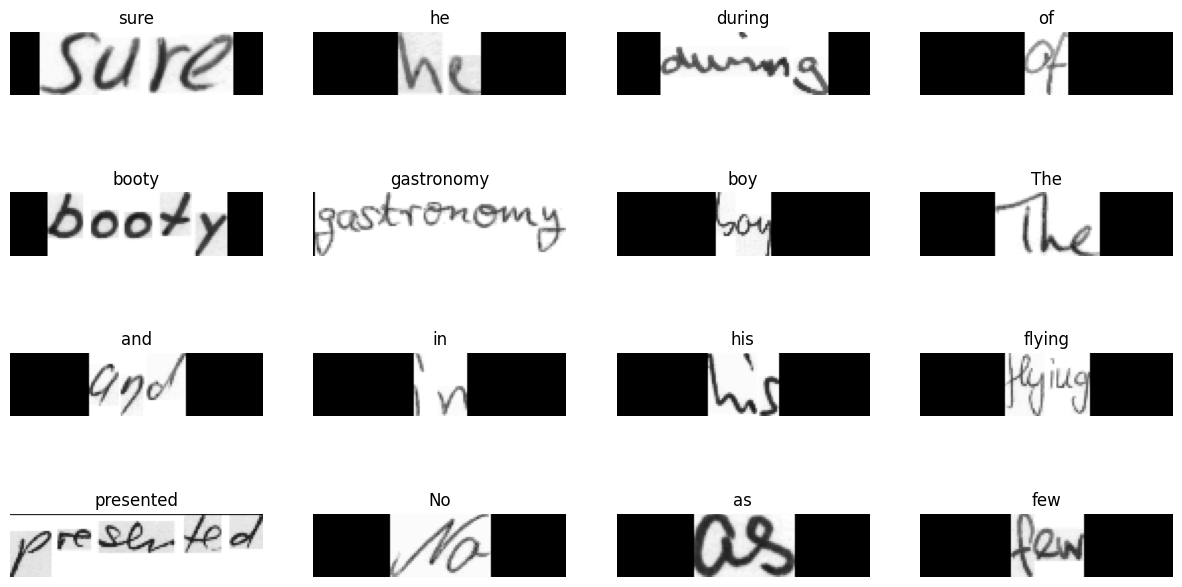

In [13]:
for data in train_ds.take(1):
  images, labels = data["image"], data["label"]
  _, ax = plt.subplots(4, 4, figsize=(15, 8))

  for i in range(16):
    img = images[i]
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]

    # Gather indices where Label!= padding token
    label = labels[i]
    indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
    # Convert to string.
    label = tf.strings.reduce_join(num_to_chars(indices))
    label = label.numpy().decode("utf-8")

    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")

  plt.show()

In [14]:
class CTCLayer(keras.layers.Layer):

  def __init__(self, name=None):
    super().__init__(name=name)
    self.loss_fn = keras.backend.ctc_batch_cost

  def call(self, y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    self.add_loss(loss)

    # At test time, just return the computed predictions.
    return y_pred

def build_model():
  input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
  labels = keras.layers.Input(name="label", shape=(None,))

  x = keras.layers.Conv2D(
      32, (3,3), activation = "relu",
      kernel_initializer="he_normal",
      padding="same",
      name="Conv1"
  )(input_img)
  x = keras.layers.MaxPooling2D((2,2), name="pool1")(x)

  # Second conv block
  x = keras.layers.Conv2D(
      64, (3,3), activation = "relu", kernel_initializer="he_normal",
      padding="same",
      name="Conv2"
  )(x)
  x = keras.layers.MaxPooling2D((2,2), name="pool2")(x)

  new_shape = ((image_width // 4), (image_height // 4) * 64)
  x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
  x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
  x = keras.layers.Dropout(0.2)(x)

  # RNN
  x = keras.layers.Bidirectional(
      keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
  )(x)
  x = keras.layers.Bidirectional(
    keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
  )(x)
  # +2 is to account for the two special tokens introduced by the CTC loss.
  # The recommendation comes here: https://git.10/J0eXP.
  x = keras.layers.Dense(
    len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
  )(x)
  # Add CTC layer for calculating CTC Loss at each step.
  output = CTCLayer(name="ctc_loss")(labels, x)

  # Define the model.
  model1 = keras.models.Model(
      inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
  )

  # optimizer
  opt = keras.optimizers.Adam()
  # Compile the model and return
  model1.compile(optimizer=opt)
  return model1

# Get the model
model1 = build_model()


In [15]:
validation_images = []
validation_labels = []

for batch in validation_ds:
  validation_images.append(batch["image"])
  validation_labels.append(batch["label"])

In [16]:
def calculate_edit_distance(labels, predictions):
  # Get a single batch and convert its labels to sparse tensors.
  sparse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

  # Make predictions and convert them to sparse tensors.
  input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
  predictions_decoded = keras.backend.ctc_decode(
    predictions, input_length=input_len, greedy=True
  )[0][0][:, :max_len]
  sparse_predictions = tf.cast(
    tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
  )

  # Compute individual edit distances and average them out.
  edit_distances = tf.edit_distance(
    sparse_predictions, sparse_labels, normalize=False
  )
  return tf.reduce_mean(edit_distances)

class EditDistanceCallback(keras.callbacks.Callback):
  def __init__(self, pred_model):
    super().__init__()
    self.prediction_model = pred_model
  def on_epoch_end(self, epoch, logs = None):
    edit_distances = []

    for i in range(len(validation_images)):
      labels = validation_labels[i]
      predictions = self.prediction_model.predict(validation_images[i])
      edit_distances.append(calculate_edit_distance(labels, predictions).numpy())
    print(f"Mean eidt distance for each {epoch + 1}: {np.mean(edit_distances): .4f}")

In [ ]:
epochs = 80

model1 = build_model()
prediction_model = keras.models.Model(
  model1.get_layer(name="image").input, model1.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model1.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  callbacks=[edit_distance_callback],
)
model1.save('modelword.keras')

prediction_model = keras.models.Model(
  model1.get_layer(name="image").input, model1.get_layer(name="dense2").output
)
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    # Iterate over the results and get back the text.
    output_text = []

    for res in results:
      res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
      res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
      output_text.append(res)

    return output_text


Epoch 1/80
1/1 [==============================] - 1s 1s/step
Mean eidt distance for each 1:  20.4576
1357/1357 [==============================] - 283s 203ms/step - loss: 13.5763 - val_loss: 11.4885
Epoch 2/80
1/1 [==============================] - 0s 42ms/step
Mean eidt distance for each 2:  19.9725
1357/1357 [==============================] - 194s 143ms/step - loss: 10.2649 - val_loss: 9.0224
Epoch 3/80
1/1 [==============================] - 0s 41ms/step
Mean eidt distance for each 3:  19.3707
1357/1357 [==============================] - 196s 145ms/step - loss: 8.2669 - val_loss: 7.0390
Epoch 4/80
1/1 [==============================] - 0s 44ms/step
Mean eidt distance for each 4:  18.8128
1357/1357 [==============================] - 190s 140ms/step - loss: 6.5858 - val_loss: 5.3859
Epoch 5/80
1/1 [==============================] - 0s 54ms/step
Mean eidt distance for each 5:  18.3356
1357/1357 [==============================] - 194s 143ms/step - loss: 5.3558 - val_loss: 4.3222
Epoch 6/8

In [ ]:

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    # Iterate over the results and get back the text.
    output_text = []

    for res in results:
      res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
      res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
      output_text.append(res)

    return output_text


# Let's check results on sone test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
      img = batch_images[i]
      img = tf.image.flip_left_right(img)
      img = tf.transpose(img, perm=[1, 0, 2])
      img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
      img = img[:, :, 0]

      title = f"Prediction: {pred_texts[i]}"
      ax[i // 4, i % 4].imshow(img, cmap = "gray")
      ax[i // 4, i % 4].set_title(title)
      ax[i // 4, i % 4].axis("off")

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def predict_on_new_image(image_path):
    # Load and preprocess the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=1)
    image = distortion_free_resize(image, (image_width, image_height))
    image = tf.cast(image, tf.float32) / 255.0

    # Add a dimension for the batch size
    image_batch = tf.expand_dims(image, axis=0)

    # Predict the output
    preds = prediction_model.predict(image_batch)
    pred_texts = decode_batch_predictions(preds)

    # Rotate the image 90 degrees counter-clockwise
    image_rotated = np.rot90(image, +1)

    

    return pred_texts[0]

# Use the function
image_path = "g.jpg"
print(predict_on_new_image(image_path))

In [ ]:
import tkinter as tk
import os.path
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import StringLookup

def open_new_main_window():
    file_name=entry.get()
    file_path = f'Mini Project/{file_name}.txt'
    if os.path.isfile(file_path):
        file=open(f'{file_name}.txt','a')
    else:
        file=open(f'{file_name}.txt','w')
    model = load_model('modeldig.h5')
    image_folder = "img/"
    
    root1 = Tk()
    root1.resizable(0, 0)
    root1.title("HDR")
    
    lastx, lasty = None, None
    image_number = 0
    
    cv = Canvas(root1, width=640, height=480, bg='white')
    cv.pack(pady=2, anchor='w')
    
    
    def clear_widget():
        cv.delete('all')
    
    
    def draw_lines(event):
        global lastx, lasty
        x, y = event.x, event.y
        cv.create_line((lastx, lasty, x, y), width=8, fill='black', capstyle=ROUND, smooth=TRUE, splinesteps=12)
        lastx, lasty = x, y
    
    
    def activate_event(event):
        global lastx, lasty
        cv.bind('<B1-Motion>', draw_lines)
        lastx, lasty = event.x, event.y
    
    
    cv.bind('<Button-1>', activate_event)
    
    
    def Recognize_Digit():
        global image_number
        filename = f'img_{image_number}.png'
        widget = cv
    
        x = root1.winfo_rootx() + widget.winfo_rootx()
        y = root1.winfo_rooty() + widget.winfo_rooty()
        x1 = x + widget.winfo_width()
        y1 = y + widget.winfo_height()
        print(x, y, x1, y1)
    
        # get image and save
        ImageGrab.grab().crop((x, y, x1, y1)).save(image_folder + filename)
    
        image = cv2.imread(image_folder + filename, cv2.IMREAD_COLOR)
        gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
        ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
        contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            # make a rectangle box around each curve
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)
    
            digit = th[y:y + h, x:x + w]
    
            # Resizing that digit to (18, 18)
            resized_digit = cv2.resize(digit, (18, 18))
            padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
    
            digit = padded_digit.reshape(1, 28, 28, 1)
            digit = digit / 255.0
    
            pred = model.predict([digit])[0]
            final_pred = np.argmax(pred)
            data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'
            file.write(f'{final_pred}  ')
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 0.5
            color = (255, 0, 0)
            thickness = 1
            cv2.putText(image, data, (x, y - 5), font, fontScale, color, thickness)
        file.write('\n')
        cv2.waitKey(0)
    
    
    btn_save = Button(root1,text='Recognize Digit', command=Recognize_Digit)
    btn_save.pack(side=tk.LEFT, padx=10, pady=10)
    button_clear = Button(root1, text='Clear Widget', command=clear_widget)
    button_clear.pack(side=tk.LEFT, padx=10, pady=10)
    
    root1.mainloop()

def word_recognition():
    file_name1=entry.get()
    file_path1 = f'Mini Project/{file_name1}.txt'
    if os.path.isfile(file_path1):
        file1=open(f'{file_name1}.txt','a')
    else:
        file1=open(f'{file_name1}.txt','w')
    image_folder = "img/"
    image_number1 = 1
    root2 = Tk()
    root2.resizable(0, 0)
    root2.title("Handwritten word recognition")

    canvas = tk.Canvas(root2, width=400, height=200, bg="white")
    canvas.pack()
    widget2=canvas
    def clear_widget():
        canvas.delete('all')

    def on_mouse_drag(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        canvas.create_oval(x1, y1, x2, y2, fill="black", width=5)
    filename = f'img_{image_number1}.png'
    def recognize_word():
        x4 = widget2.winfo_rootx()
        y4 = widget2.winfo_rooty()
        x5 = x4 + widget2.winfo_width()
        y5 = y4 + widget2.winfo_height()
        ImageGrab.grab().crop((x4, y4, x5, y5)).save(image_folder + filename)
        imagepath=f'img/img_1.png'
        recognized_word=""
        recognized_word=predict_on_new_image(imagepath)
        file1.write(recognized_word)
        print(recognized_word)
        
    canvas.bind("<B1-Motion>", on_mouse_drag)

    def new_line():
        file_name1=entry.get()
        file_path = f'Mini Project/{file_name1}.txt'
        if os.path.isfile(file_path):
            file=open(f'{file_name1}.txt','a')
        else:
            file=open(f'{file_name1}.txt','w')
        file.write('\n')

    def space():
        file_name1=entry.get()
        file_path = f'Mini Project/{file_name1}.txt'
        if os.path.isfile(file_path):
            file=open(f'{file_name1}.txt','a')
        else:
            file=open(f'{file_name1}.txt','w')
        file.write(' ')
        
    btn_save = Button(root2,text='Recognize word', command=recognize_word)
    btn_save.pack(side=tk.LEFT, padx=10, pady=10)
    button_clear = Button(root2, text='Clear Widget', command=clear_widget)
    button_clear.pack(side=tk.LEFT, padx=10, pady=10)
    btn_enter = Button(root2,text='New line', command=new_line)
    btn_enter.pack(side=tk.LEFT, padx=10, pady=10)
    button_space = Button(root2, text='Space', command=space)
    button_space.pack(side=tk.LEFT, padx=10, pady=10)
    
    root2.mainloop()

# Create the main window
root = tk.Tk()
root.title("Main Window")
root.minsize(400,200)
label = tk.Label(root, text="Enter file name to input data:")
label.pack()
# Create an entry widget (edit text box)
entry = Entry(root)
entry.pack()

# Create buttons for handwritten digit recognition and word recognition
digit_button = Button(root, text="Handwritten Digit Recognition", command=open_new_main_window)
digit_button.pack()

word_button = Button(root, text="Word Recognition", command=word_recognition)
word_button.pack()

root.mainloop()